In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
for record in SeqIO.parse("frag.R1.fastq", 'fastq-illumina'):
    if len(record.seq) != 150:
        print('Oops..')
        break

In [ ]:
for record in SeqIO.parse("frag.R2.fastq", 'fastq-illumina'):
    if len(record.seq) != 150:
        print('Oops..')
        break

Нам повезло и у нас везде количество нуклеотидов в последовательности равно 150. Поэтому мы просто можем создать словарик с ключами от одного до 150

In [2]:
d = {
    
}

for i in range(1, 151):
    d[i] = 0

Далее просто складываем всё возможное качество

In [3]:
errors = []
count_1 = 0
for record in SeqIO.parse("/content/drive/MyDrive/frag.R2.fastq", 'fastq-illumina'):
    seq_len = len(list(record.seq)) - 1
    count_1 += 1 # считаем количество ридов
    while seq_len >= 0:
        d[seq_len + 1] += record.letter_annotations['phred_quality'][seq_len]
        seq_len -= 1

In [4]:
for record in SeqIO.parse("/content/drive/MyDrive/frag.R1.fastq", 'fastq-illumina'):
    seq_len = 0
    while seq_len < len(record.seq):
        d[seq_len + 1] += record.letter_annotations['phred_quality'][seq_len]
        seq_len += 1

In [23]:
count_1 = 0
for record in SeqIO.parse("/content/drive/MyDrive/frag.R1.fastq", 'fastq-illumina'):
    count_1 += 1

In [ ]:
count_2 == count_1

True

Количество ридов тоже одинаковое (я проверил)

Поэтому можем просто сложить все качество для каждого нуклеотида, а затем разделить на общее количество ридов

In [6]:
for i in d.keys():
    d[i] = d[i] / 2 / count_1

In [7]:
d

{1: 31.80281724199415,
 2: 32.043468291824524,
 3: 32.103566230155074,
 4: 35.73513473512716,
 5: 35.64325461984801,
 6: 35.612284419717724,
 7: 35.57725462684028,
 8: 35.541735958074376,
 9: 37.11221391437505,
 10: 37.09431225825699,
 11: 36.95462631585694,
 12: 36.949093685867815,
 13: 36.90720185854414,
 14: 38.13578454965732,
 15: 38.09809390845493,
 16: 38.050087636392874,
 17: 37.99931242723674,
 18: 37.92977318256455,
 19: 37.90171555231321,
 20: 37.7737486467053,
 21: 37.670213007711304,
 22: 37.52508125595071,
 23: 37.34038056569758,
 24: 37.20534010961541,
 25: 37.015783873738336,
 26: 36.778915348139066,
 27: 36.559549045497505,
 28: 36.33042561919424,
 29: 35.978956777311495,
 30: 35.72379357201043,
 31: 35.438569161079656,
 32: 35.08983021614258,
 33: 34.72769292534242,
 34: 34.40097408083758,
 35: 34.1035554504126,
 36: 33.92073917568183,
 37: 33.639322635944204,
 38: 33.29013822543297,
 39: 32.97923792464902,
 40: 32.647614588662506,
 41: 32.32932433739545,
 42: 32.00875

In [8]:
for i in d.keys():
    d[i] = (10**(-d[i]/10))/(1+10**(-d[i]/10))

Выполняем преобразование, которое приводит значения качества к вероятности ошибки

In [9]:
d

{1: 0.0006598293369349362,
 2: 0.0006242836533173342,
 3: 0.00061570955790054,
 4: 0.00026691353181816754,
 5: 0.0002726190028413134,
 6: 0.00027456950302374484,
 7: 0.0002767924955193797,
 8: 0.0002790648841650787,
 9: 0.00019439906595872933,
 10: 0.0001952018776340041,
 11: 0.00020158110151878876,
 12: 0.00020183801454458928,
 13: 0.00020379395540015715,
 14: 0.00015358713453482835,
 15: 0.000154925647736054,
 16: 0.00015664740323836164,
 17: 0.00015848929034216423,
 18: 0.00016104703527402097,
 19: 0.00016209067991329224,
 20: 0.00016693700955641507,
 21: 0.00017096391097352336,
 22: 0.00017677265966544684,
 23: 0.00018445134645890982,
 24: 0.00019027570751629694,
 25: 0.00019876288070472365,
 26: 0.00020990234775425558,
 27: 0.00022077464934578046,
 28: 0.00023273213416684314,
 29: 0.0002523450072125287,
 30: 0.0002676112737468391,
 31: 0.0002857715281262664,
 32: 0.0003096581214105762,
 33: 0.00033657705748586287,
 34: 0.0003628649102400467,
 35: 0.0003885757249004386,
 36: 0.0004

Как видно, в начале вероятность ошибки довольно мала, что нельзя сказать о последних нуклеотидах.

Такое качество свойственно для прочтения с помощью технологии Illumina

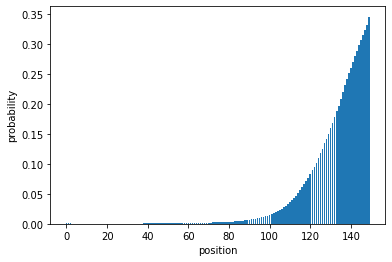

In [10]:
plt.bar(range(len(d)), d.values(), align="center")
plt.xlabel('position')
plt.ylabel('probability')
None

Можем убедиться в этом, оценив график из FASTQC
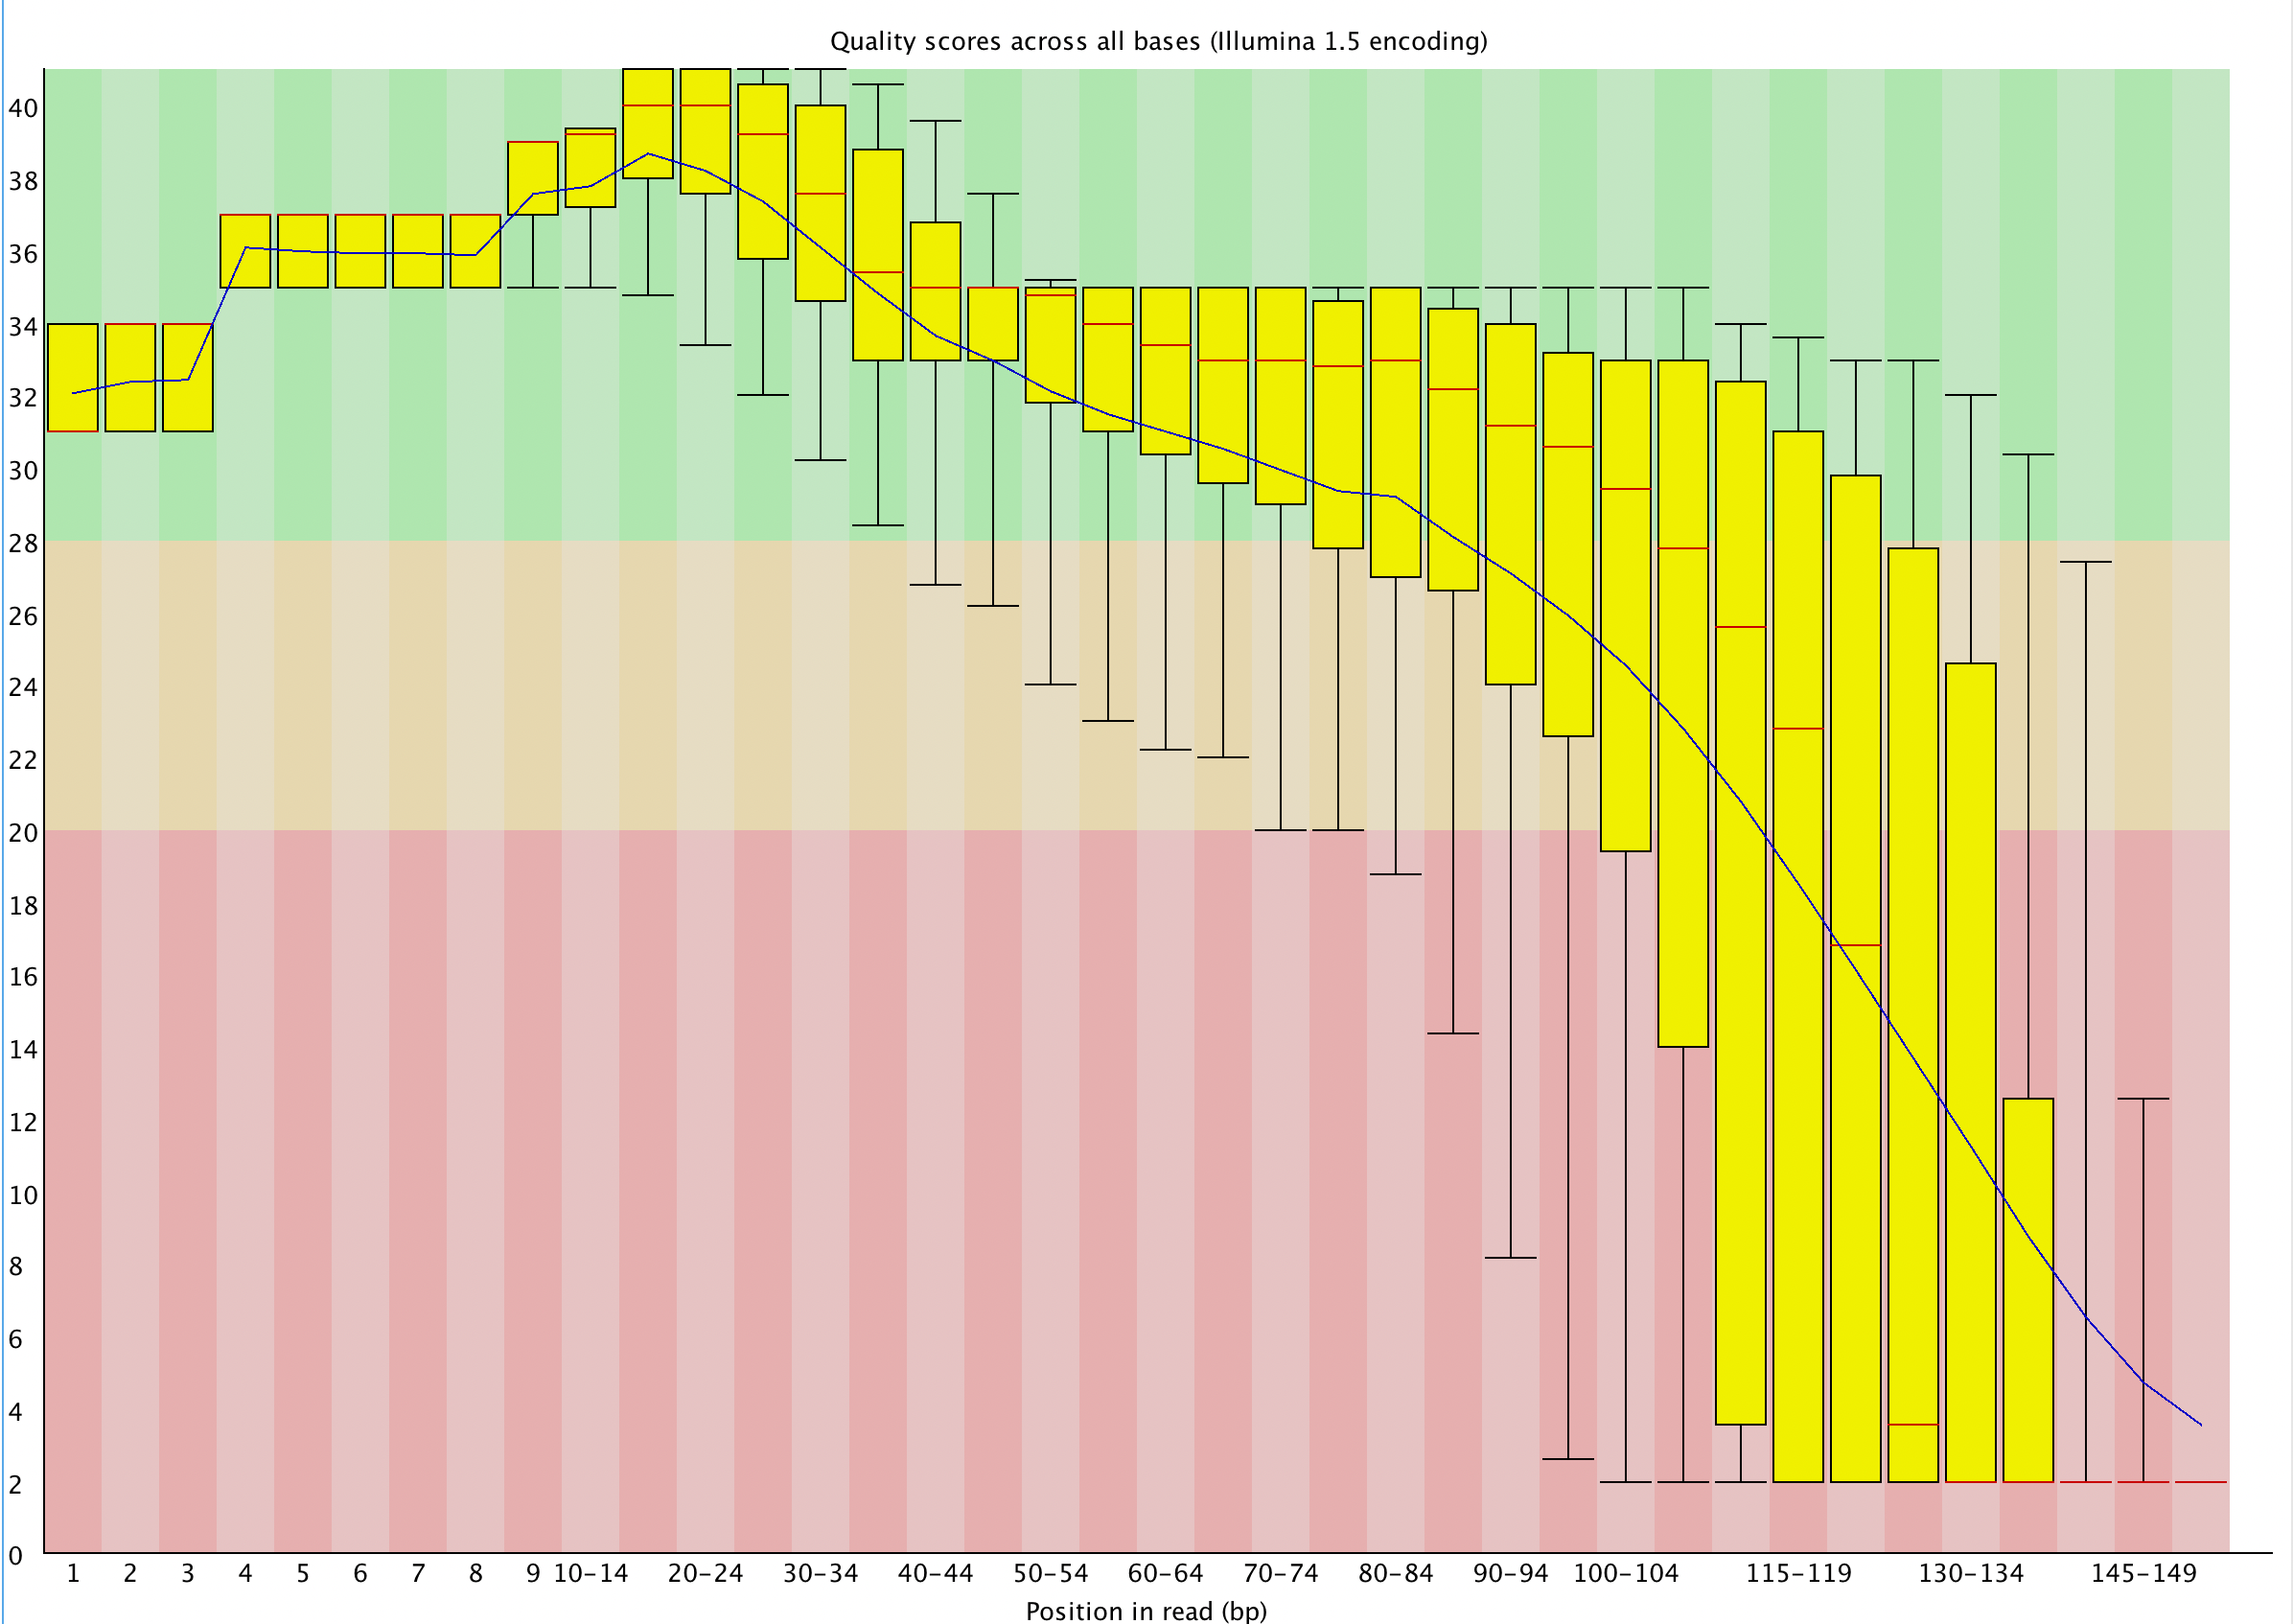

Видно, что качество очень сильно падает, начиная с сотого нуклеотида